# Data Storytelling: World Happiness Report 2023 #

**Introduction:** 

The pursuit of happiness is a universal human aspiration, and understanding the factors that contribute to it is crucial for promoting well-being and prosperity worldwide. In this data storytelling project, we delve into the findings of the World Happiness Report 2023 to uncover insights into happiness scores across countries and regions. By analyzing various socio-economic factors, regional disparities, and potential influences on happiness, we aim to shed light on the complex dynamics of global well-being.

**Target Audience**: 

This data story is intended for a general audience interested in understanding global happiness trends and the factors that shape them. Whether you're a policymaker, researcher, or simply curious about the state of happiness worldwide, this analysis offers valuable insights into the intricacies of happiness measurement and its implications for society.

## Contents
  * [1. Imports](#1)
  * [2. Load data](#2)
  * [3. Data Wrangling](#3)
  * [4. Exploratory Data Analysis (EDA)](#4)
  * [5. Summary and Future Work](#5)
  * [6. Other Factors and Hypothesis](#6)


## 1. Imports<a id='1'></a>

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd 
import country_converter as coco # for Region

## 2. Load data<a id='2'></a>

In [2]:
# Loading the dataset for 2023
df = pd.read_csv('WorldHappinessReport2023.csv')
df.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

- The dataset has 18 numeric columns (float64 data type) and 1 string column (object data type)
- 'Healthy life expectancy', 'Explained by: Healthy life expectancy' and 'Dystopia + residual' columns have 136 non-missing values out of 137 rows, indicating one missing value in each of these columns.

In [4]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,1.370000e+02,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,136.000000
mean,5.539796,0.064715,5.666526,5.412971,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401,1.778000e+00,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898,1.777838
std,1.139929,0.023031,1.117421,1.163724,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956,2.897173e-15,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723,0.504390
min,1.859000,0.029000,1.923000,1.795000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,1.778000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,4.724000,0.047000,4.980000,4.496000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000,1.778000e+00,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000,1.555250
50%,5.684000,0.060000,5.797000,5.529000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000,1.778000e+00,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000,1.848500
75%,6.334000,0.077000,6.441000,6.243000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000,1.778000e+00,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000,2.078750
max,7.804000,0.147000,7.875000,7.733000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000,1.778000e+00,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000,2.955000


- The minimum 'Ladder score' (happiness score) is 1.859, while the maximum is 7.804, indicating a wide range of happiness levels across countries.
- The mean values for factors like 'Logged GDP per capita' (9.449796), 'Social support' (0.799073), and 'Freedom to make life choices' (0.787394) provide insights into their potential impact on happiness scores.
- The minimum value for 'Healthy life expectancy' is 51.53 years, and the maximum is 77.28 years, highlighting the disparities in healthy life expectancy across countries.
- The minimum value for 'Perceptions of corruption' is 0.146, and the maximum is 0.929, indicating varying levels of perceived corruption across countries.
- The 'Dystopia + residual' column, which represents the unexplained portion of the happiness score, has a mean of 1.777838 and a standard deviation of 0.504390. 
The minimum value is -0.11, and the maximum is 2.955, suggesting that there are factors beyond the provided variables that contribute to the happiness scores.

## 3. Data wrangling<a id='3'></a>

In [5]:
# Checking for missing values
df.isnull().sum() 

Country name                                  0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       1
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           1
dtype: int64

In [6]:
# Dropping rows with missing values
df.dropna(inplace=True)  
df.shape

(136, 19)

In [7]:
# Check for duplicated rows
df.duplicated().sum()

0

In [8]:
# Renaming columns for better readability
df = df.rename(columns={'Country name': 'Country',
                        'Ladder score': 'Happiness_Score',
                        'Logged GDP per capita': 'GDP_per_capita',
                        'Healthy life expectancy': 'Life_Expectancy',
                        'Freedom to make life choices': 'Freedom',
                        'Perceptions of corruption': 'Corruption_Perception',
                        'Dystopia + residual': 'Residual'})

In [9]:
# Converting country names to regions
df['Region'] = df['Country'].apply(lambda x: coco.convert(names=x, to='continent'))

In [10]:
# Creating a new column for happiness rank
df['Happiness Rank'] = df['Happiness_Score'].rank(method='dense', ascending=False).astype(int)

In [11]:
# Sorting data by happiness score
df = df.sort_values(by='Happiness_Score', ascending=False)
df.head()

,Country,Happiness_Score,Standard error of ladder score,upperwhisker,lowerwhisker,GDP_per_capita,Social support,Life_Expectancy,Freedom,Generosity,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Residual,Region,Happiness Rank
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,...,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363,Europe,1
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,...,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084,Europe,2
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,...,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250,Europe,3
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,...,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691,Asia,4
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,...,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110,Europe,5


## 4. Exploratory Data Analysis (EDA)<a id='4'></a>

The World Happiness Report dataset provides insights into happiness scores across countries and the various factors influencing these scores. Upon examining the dataset, significant variations among countries become apparent, with happiness scores being closely tied to factors such as GDP per capita, social support, health, and freedom.

In [12]:
# Compare happiness scores of countries
print("\nTop 10 Happiest Countries:")
print(df.sort_values(by='Happiness_Score', ascending=False).head(10)[['Country', 'Happiness_Score']])
print("\nBottom 5 Unhappiest Countries:")
print(df.sort_values(by='Happiness_Score', ascending=True).head(5)[['Country', 'Happiness_Score']])


Top 10 Happiest Countries:
       Country  Happiness_Score
0      Finland            7.804
1      Denmark            7.586
2      Iceland            7.530
3       Israel            7.473
4  Netherlands            7.403
5       Sweden            7.395
6       Norway            7.315
7  Switzerland            7.240
8   Luxembourg            7.228
9  New Zealand            7.123

Bottom 5 Unhappiest Countries:
              Country  Happiness_Score
136       Afghanistan            1.859
135           Lebanon            2.392
134      Sierra Leone            3.138
133          Zimbabwe            3.204
132  Congo (Kinshasa)            3.207


Countries like Finland, Denmark, and Iceland rank among the top in happiness scores, attributed to factors like robust social support systems, high quality of life, and freedom. Conversely, countries such as Afghanistan, Lebanon, and Sierra Leone exhibit lower happiness scores, mainly due to harsh living conditions and lack of social support.

In [13]:
# Compare happiness scores by regions
region_groups = df.groupby('Region')['Happiness_Score'].mean().sort_values(ascending=False)
print("\nAverage Happiness Scores by Region:")
print(region_groups)


Average Happiness Scores by Region:
Region
Oceania    7.109000
Europe     6.476462
America    6.057619
Asia       5.311162
Africa     4.419486
Name: Happiness_Score, dtype: float64


Regionally, Oceania and Europe tend to have higher average happiness scores compared to Asia and Africa.

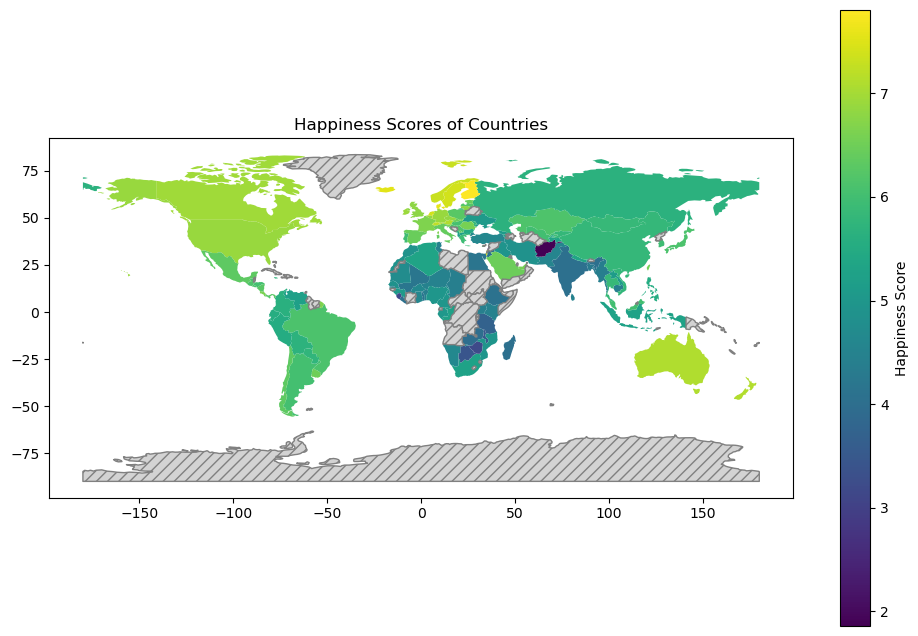

In [14]:
# Map visualization
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Standardizing country names
df['Country'] = df['Country'].replace({
    'Turkey': 'Turkey',
    'Turkiye': 'Turkey',
    'United States': 'United States of America',
    'Taiwan Province of China': 'Taiwan',
    'Congo (Brazzaville)': 'Congo',
    'Congo (Kinshasa)': 'Democratic Republic of the Congo',
    'Bosnia and Herz.': 'Bosnia and Herzegovina'
})

# Merging data
merged = world.merge(df, left_on='name', right_on='Country', how='left')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged.plot(column='Happiness_Score', cmap='viridis', 
            legend=True, legend_kwds={'label': "Happiness Score"},
            missing_kwds={"color": "lightgrey", "edgecolor": "grey", "hatch": "///", "label": "Missing values"},
            ax=ax)
ax.set_title('Happiness Scores of Countries')
plt.show()

A map visualization provides a clear overview of happiness scores across countries.

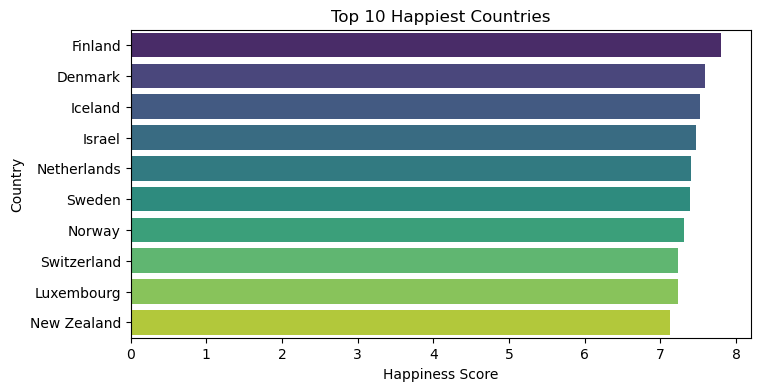

In [15]:
df_sorted = df.head(10).sort_values(by='Happiness_Score', ascending=False)

# Bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x='Happiness_Score', y='Country', data=df_sorted, palette='viridis')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Top 10 Happiest Countries')
plt.show()

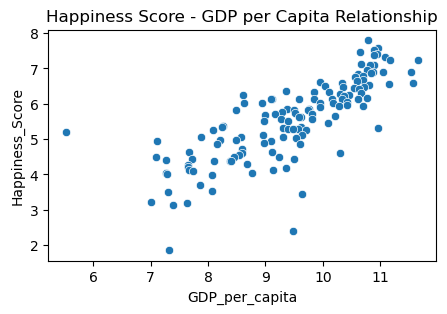

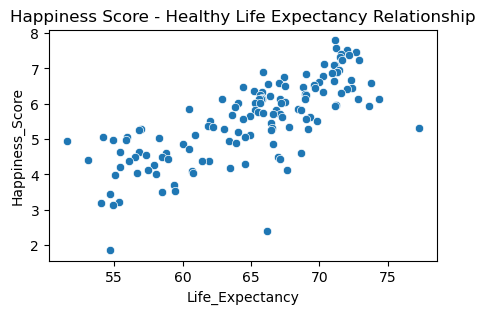

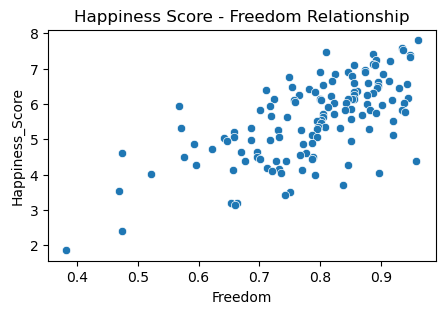

In [16]:
# Scatter plots illustrate the relationships between happiness scores and other factors like GDP per capita, life expectancy, and freedom

plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='GDP_per_capita', y='Happiness_Score')
plt.title('Happiness Score - GDP per Capita Relationship')
plt.show()

plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='Life_Expectancy', y='Happiness_Score')
plt.title('Happiness Score - Healthy Life Expectancy Relationship')
plt.show()

plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='Freedom', y='Happiness_Score')
plt.title('Happiness Score - Freedom Relationship')
plt.show()

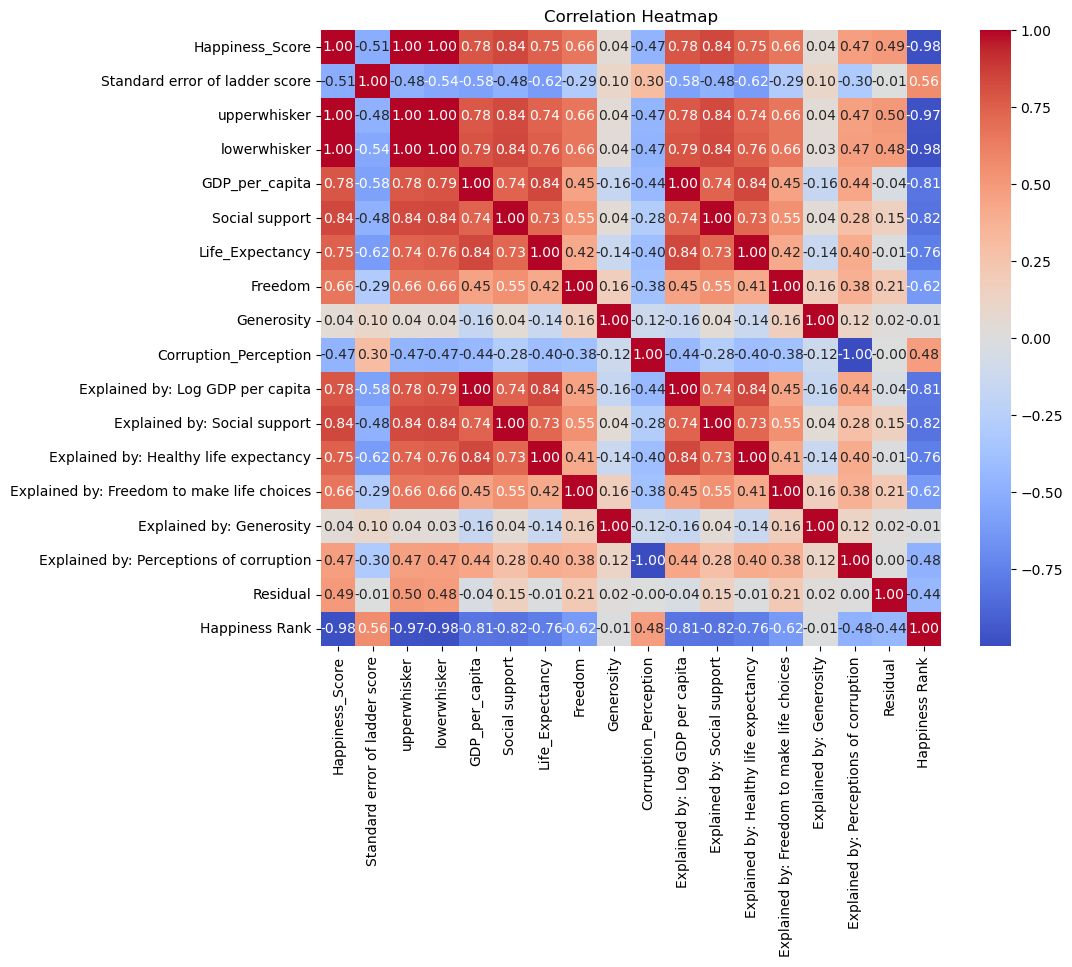

In [17]:
# Correlation heatmap

df2 = df.select_dtypes(include='number').drop(columns=['Ladder score in Dystopia'])
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Based on the correlation values:

1. **Happiness_Score** has strong **positive** correlations with: GDP_per_capita (0.784), Social_support (0.838), Life_Expectancy (0.747) and Freedom (0.662). This indicates that countries with higher GDP per capita, stronger social support systems, longer life expectancies, and greater freedom tend to have higher happiness scores.

2. **Happiness_Score** has moderate **negative** correlations with Standard error of ladder score (-0.511) and Corruption_Perception (-0.471). A higher standard error of the ladder score and perceived corruption are associated with slightly lower happiness scores.

3. **GDP_per_capita** has a strong positive correlation with Social_support (0.742) and Life_Expectancy (0.838). Higher GDP per capita is associated with stronger social support systems and longer life expectancies.

4. **Social_support** has a strong positive correlation with Life_Expectancy (0.725). This suggests that countries with strong social support systems tend to have longer life expectancies.

5. **Life_Expectancy** has a strong positive correlation with Freedom (0.415). Countries with longer life expectancies tend to have higher levels of freedom.

6. **Corruption_Perception** has a moderate negative correlation with Explained by: Perceptions of corruption (-1.000). This indicates that as the perception of corruption increases, the explained portion of corruption decreases.

## 5. Conclusion and Recommendations<a id='5'></a>

Upon analyzing the data from the World Happiness Report 2023, several key insights emerge:

- Socioeconomic Factors: Countries with higher GDP per capita, stronger social support systems, and longer life expectancies tend to have higher happiness scores.
- Regional Disparities: There are significant regional variations in happiness scores, with Oceania and Europe generally having higher average scores compared to Asia and Africa.
- Correlation Analysis: Positive correlations exist between happiness scores and factors like GDP per capita, social support, and life expectancy, while negative correlations are observed with variables like the standard error of ladder scores and perceptions of corruption.

Based on these findings, policymakers and stakeholders can consider the following recommendations:

- Investment in Social Support Systems
- Promotion of Economic Development
- Combatting Corruption
- Regional Collaboration

In conclusion, while happiness is influenced by a myriad of factors, targeted interventions addressing socioeconomic inequalities and promoting good governance can contribute to a happier and more prosperous world for all.


## 6. Other Factors and Hypothesis<a id='6'></a>

**Other Factors:**

In addition to the factors explored above, several other factors may influence happiness scores:

- Global Inequalities
- Cultural and Historical Contexts
- Sustainability and Environmental Factors
- Psychological and Spiritual Well-being

**Hypothesis:**

To investigate the influence of cultural factors on happiness scores, we propose the following hypothesis:

"Happiness scores are significantly influenced by cultural factors, as indicated by variations in happiness levels across regions with distinct cultural and historical backgrounds."

To explore this hypothesis further, we can conduct cultural analysis, examine historical contexts, perform comparative studies, and utilize qualitative research methods to gain insights into the subjective experiences of happiness within different cultural groups.